In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images to 1D vectors of 28x28=784 pixels
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32')

# Normalize the data (scaling pixel values between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Split the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build a simple feed-forward neural network model with named layers using Input
input_layer = Input(shape=(784,), name='input_layer')
hidden_layer_1 = Dense(64, activation='relu', name='hidden_layer_1')(input_layer)
hidden_layer_2 = Dense(32, activation='relu', name='hidden_layer_2')(hidden_layer_1)
output_layer = Dense(10, activation='softmax', name='output_layer')(hidden_layer_2)

# Define the complete model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
sgd = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Generate predictions for classification report
y_pred = model.predict(X_test)
y_pred_labels = lb.inverse_transform(y_pred)
print(classification_report(lb.inverse_transform(y_test), y_pred_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6563 - loss: 1.2423 - val_accuracy: 0.8968 - val_loss: 0.3766
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9008 - loss: 0.3509 - val_accuracy: 0.9181 - val_loss: 0.2915
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9193 - loss: 0.2803 - val_accuracy: 0.9258 - val_loss: 0.2514
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9305 - loss: 0.2410 - val_accuracy: 0.9338 - val_loss: 0.2269
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9378 - loss: 0.2181 - val_accuracy: 0.9392 - val_loss: 0.2108
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9428 - loss: 0.1984 - val_accuracy: 0.9461 - val_loss: 0.1920
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9480 - loss: 0.1803 - val_accuracy: 0.9464 - val_loss: 0.1848
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9528 - loss: 0.1625 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


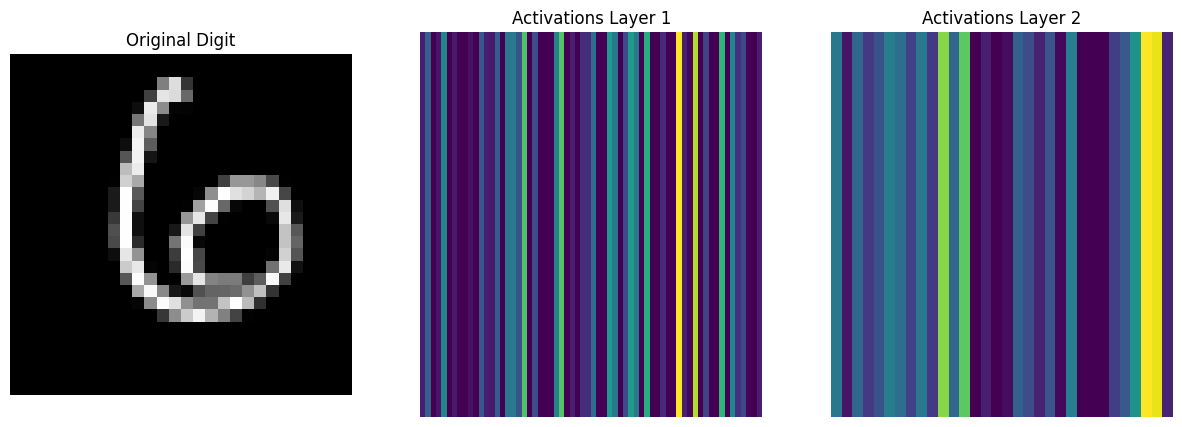

In [7]:
# Function to visualize the digit and activations
def visualize_digit_and_activations(model, X_sample, layer_names):
    # First, call the model once on the input sample to define input shapes
    model.predict(X_sample.reshape(1, -1))  # Make sure the model is "called"

    # Plot the actual digit
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(layer_names) + 1, 1)
    plt.imshow(X_sample.reshape(28, 28), cmap='gray')
    plt.title("Original Digit")
    plt.axis('off')

    # Extract the activations for the selected layers
    layer_outputs = [model.get_layer(layer_name).output for layer_name in layer_names]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(X_sample.reshape(1, -1))

    # Visualize activations from each layer
    for i, activation in enumerate(activations):
        plt.subplot(1, len(layer_names) + 1, i + 2)
        plt.imshow(activation[0].reshape(1, -1), aspect='auto', cmap='viridis')  # Use 1D heatmap
        plt.title(f"Activations Layer {i + 1}")
        plt.axis('off')

    plt.show()

# Choose a sample from the test set to visualize
sample_index = 100  # You can change this index to visualize different digits
X_sample = X_test[sample_index]

# Layer names for the first and second hidden layers
layer_names = ['hidden_layer_1', 'hidden_layer_2']

# Call the visualization function
visualize_digit_and_activations(model, X_sample, layer_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This graph shows some test data together with the model predictions


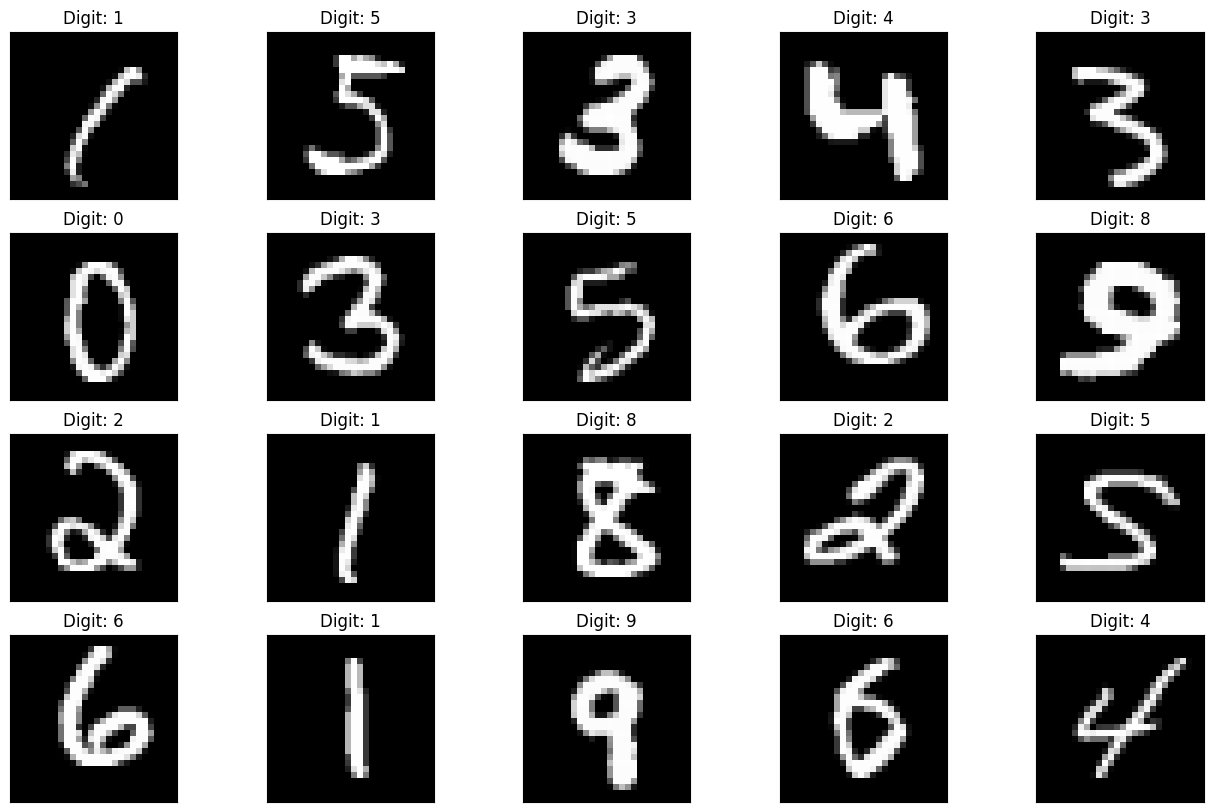

In [5]:
import matplotlib.pyplot as plt
import random

def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])

random.seed(5)

plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 784)))[0], axis=-1)
    plot_digit(image.reshape(28,28), digit, plt, i)

print("This graph shows some test data together with the model predictions")
plt.show()